In [1]:
from eoshub import EOSHub

{'water_linear': '/Users/afq/Google Drive/networks/', 'water_iapws_rh_lg': '/Users/afq/Documents/Research/LBNL/eoshub/eoshub/networks/', 'water_iapws_lg': '/Users/afq/Google Drive/networks/', 'water_slgc': '/Users/afq/Google Drive/networks/', 'water_iapws_slgc_logp_comp': '/Users/afq/Google Drive/networks/'}


In [4]:
eos = 'water_iapws_slgc_logp_comp'
network = 'Classifying_pT_0.0_2,6,24,48,sigmoid,0.05'
ls = EOSHub.LatentSim(eos,network)

In [3]:
import cornflakes as cf
import numpy as np
from matplotlib import pylab as plt

Set up the computation graph with cornflakes

In [6]:
Ny = 10
L = 1
X = np.linspace(0,Ny,10)
H_vol = cf.Hypergraph()
for i in range(Ny):
    H_vol.Push_Edge([i])
H_face = cf.Hypergraph()
for i in range(Ny-1):
    H_face.Push_Edge([i,i+1])

Define the cornflakes data and dofmap structures

In [7]:
q = np.zeros(2*Ny)
dm_q = cf.Dofmap(2,0,2)
data = {'q':(q,dm_q)}

In [8]:
for e in H_vol:
    ii = dm_q.Get_List(e)
    _q = q[ii]
    print(_q)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


In [9]:
rho0,T0 = 200,500
q0 = ls.find_point(rho=rho0,T=T0)
for e in H_vol:
    q[dm_q.Get_List(e)] = q0
    

In [20]:
def plot(q):
    s = ls.decode(q.reshape(-1,2))
    for i,leg in enumerate(['T','P','rho','rho*h']):
        plt.subplot(1,4,i+1)
        plt.plot(s[:,i],X)
        plt.xlabel(leg)
        plt.ylabel('z')
    plt.tight_layout()
    plt.show()

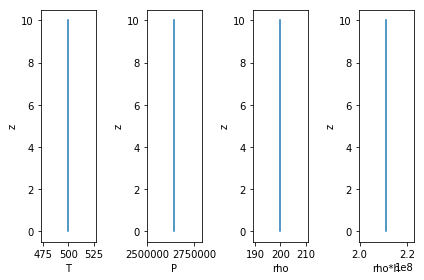

In [21]:
plot(q)

# scratch

In [19]:
X = cf.ParticlePlacers.init_grid(Nx=5,Ny=5,start=[0,0],e1=[L,0],e2=[0,L])
H = cf.Graphers.Build_Pair_Graph(X,cutoff=0.12)

In [21]:
H.view()

[array([[ 0,  2],
        [ 1,  3],
        [ 2,  4],
        [ 3,  5],
        [ 4,  6],
        [ 5,  7],
        [ 6,  8],
        [ 7,  9],
        [ 8, 10],
        [ 9, 11],
        [10, 12],
        [11, 13],
        [14, 12],
        [14, 16],
        [15, 13],
        [15, 17],
        [16, 18],
        [17, 19]], dtype=int32)]

In [29]:
for e in H:
    plt.plot(X[:,e[0]],X[:,e[1]])
plt.show()

IndexError: too many indices for array